In [1]:
# imports
import numpy as np
#import array_to_latex as a2l
import scipy.constants as pc
import matplotlib.pyplot as plt
import matplotlib.colors as c
import sympy as sy
from sympy import *

In [10]:
# Funktionen

def am(werte):
    return np.mean(werte)

def std(werte):
    summen_der_quadrate = 0
    for wert in werte:
        summen_der_quadrate+=(wert-am(werte))**2       
    return np.sqrt(summen_der_quadrate/(werte.size-1))

def stu(werte):
    return std(werte)/np.sqrt(werte.size)

def fehler(f, werte, unsicherheiten, variablen):
    zMax = 0
    for i in range(werte.size):
        dif = np.abs(sy.diff(f, variablen[i]))
        zMax += (dif * unsicherheiten[i])**2
    zMax = sqrt(zMax)
    for j in range(werte.size):
        zMax = sub(zMax, variablen[j], werte[j])
    return zMax

def fehlerMax(f, werte, unsicherheiten, variablen):
    zMax = 0
    for i in range(werte.size):
        dif = np.abs(sy.diff(f, variablen[i]))
        zMax += dif * unsicherheiten[i]
    for j in range(werte.size):
        zMax = sub(zMax, variablen[j], werte[j])
    return zMax

def sub(zMax, variable, wert):
    return zMax.subs([(variable, wert)])

def einfachGaussAdd(unsicherheiten, koeffizienten):
    dz = 0
    for i in range (unsicherheiten.size):
        dz += (unsicherheiten[i]*unsicherheiten[i])**2
    return sqrt(dz)

def einfachGaussMult(unsicherheiten, werte, exponenten):
    dz = 0
    for i in range (unsicherheiten.size):
        dz += (exponenten[i]*unsicherheiten[i]/werte[i])**2
    return sqrt(dz)

def vertraeglichkeit(am_1, am_2, stu_1, stu_2):
    return (np.abs(am_1-am_2)/(sqrt((stu_1**2)*(stu_2**2))))

def bestA(x, y):
    return (sum(x**2)*sum(y)-sum(x)*sum(x*y))/(x.size*sum(x**2)-sum(x)**2)

def bestB(x, y):
    return (x.size*sum(x*y)-sum(x)*sum(y))/(x.size*sum(x**2)-sum(x)**2)

def streuung(x, y):
    s = 0
    for i in range(x.size):
        s += (y[i]+(bestA(x, y)+bestB(x, y)*x[i]))**2
    return np.sqrt(s/(x.size-2))

def stuA(x, y):
    s = streuung(x, y)
    return s*np.sqrt(sum(x**2)/((x.size*sum(x**2)-sum(x)**2)))

def stuB(x, y):
    s = streuung(x, y)
    return s*np.sqrt(x.size/((x.size*sum(x**2)-sum(x)**2)))

def print_to_table(avgs, stds, rows, cols,
                   highlight_best=True,
                   max_is_best=True,
                   avg_format='{0:!>4.1f}',
                   std_format='{1:!<4.1f}',
                   file=None,
                   col_orientation='c'):
    # Find best values
    best_avg = {}
    if highlight_best:
        if max_is_best:
            for c in cols:
                idx = np.argmax(avgs[c], axis=0)
                best_avg[c] = idx
        else:
            for c in cols:
                idx = np.argmin(avgs[c], axis=0)
                best_avg[c] = idx

    # Header
    print_str = '\\begin{tabular}{l' + (" "+col_orientation) * len(cols) + '} \hline\n'
    for c in cols:
        print_str += ' & ' + c
    print_str += ' \\\\ \n \hline'

    # Content
    for m in range(len(rows)):
        row_name = rows[m]
        print_str += '\n{0}'.format(row_name)
        for c in cols:
            print_str += ' &\n '
            print_list = [avgs[c][m]]
            print_list += [stds[c][m]]
            if m == best_avg.get(c, None):
                print_str += ('$\mathbf{{'+ avg_format + ' \\pm ' + std_format + '}}$').format(*print_list)
            else:
                print_str += ('$'+ avg_format + ' \\pm ' + std_format + '$').format(*print_list)

        print_str += "\n \\vspace*{0.0mm} \\\\"
        print_str = print_str.replace('!', '\\phantom{0}')

    # Footer
    print_str += '\n \hline \n \end{tabular}'

    # Write output
    if file is None:
        print(print_str)
    else:
        with open(file, 'w') as f:
            f.write(print_str)

In [3]:
# Erinnerungen
# x = np.array([,])
# x.size
# x, y = symbols('x y')
# expr = x*y
# expr.subs([(x, wert_x), (y, wert_y)])

# Anfangsgeschwindigkeit da Abbremsbereich zu klein
# Kugelunreinheiten
# Strömung im Rohr
# Schräges Einfallen
# Raumtemperatur durch verädnliche Außentemperatur variabel

1250.0 7799.437486174611
AM der Zeit für Größe  3.0 mm 13.137
STD der Zeit für Größe  3.0 mm 0.22281282628151283
STU der Zeit für Größe  3.0 mm 0.0704596022949006
AM der Zeit für Größe  3.5 mm 9.738000000000001
STD der Zeit für Größe  3.5 mm 0.0758360805363191
STU der Zeit für Größe  3.5 mm 0.023981474331473192
AM der Zeit für Größe  4.0 mm 7.547
STD der Zeit für Größe  4.0 mm 0.06377913277693395
STU der Zeit für Größe  4.0 mm 0.020168732676541106
AM der Zeit für Größe  4.5 mm 6.115
STD der Zeit für Größe  4.5 mm 0.08733715004382606
STU der Zeit für Größe  4.5 mm 0.02761843184863649
AM der Zeit für Größe  5.0 mm 4.970000000000001
STD der Zeit für Größe  5.0 mm 0.069121471177759
STU der Zeit für Größe  5.0 mm 0.02185812841433998
AM der Zeit für Größe  5.5 mm 4.21
STD der Zeit für Größe  5.5 mm 0.06960204339273694
STU der Zeit für Größe  5.5 mm 0.02201009869229222
AM der Zeit für Größe  6.0 mm 3.665
STD der Zeit für Größe  6.0 mm 0.061508806957486506
STU der Zeit für Größe  6.0 mm 0.0194

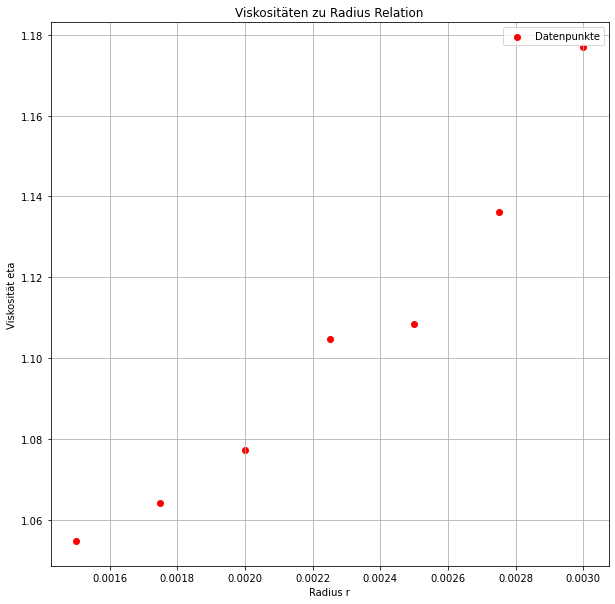

In [4]:
# Kugelfall
laenge = 0.4

r = np.array([0.003, 0.0035, 0.004, 0.0045, 0.005, 0.0055, 0.006])/2

gewichte_K = np.array([0.00112, 0.00175, 0.00261, 0.00371, 0.00508, 0.00677, 0.0088])/10


dichte_K = am(gewichte_K/((4/3)*pc.pi*r**3))
dichte_K_stu = stu(gewichte_K/((4/3)*pc.pi*r**3))
dichte_G = 1.250/1000*(100)**3 # kg/m³ +-50

print(dichte_G, dichte_K)

t_3_mm = np.array([13.13, 13.21, 13.23, 13.30, 13.5, 12.82, 13.18, 12.98, 13.25, 12.77])
t_35_mm = np.array([9.74, 9.81, 9.63, 9.79, 9.73, 9.66, 9.63, 9.75, 9.8, 9.84])
t_4_mm = np.array([7.62, 7.52, 7.50, 7.55, 7.50, 7.48, 7.64, 7.63, 7.47, 7.56])
t_45_mm = np.array([6.09, 6.24, 6.1, 5.96, 6.14, 6.18, 6.21, 6.15, 6.07, 6.01])
t_5_mm = np.array([4.83, 4.99, 5.02, 4.89, 4.97, 5.01, 5.06, 4.95, 4.95, 5.03])
t_55_mm = np.array([4.21, 4.24, 4.27, 4.28, 4.20, 4.04, 4.27, 4.21, 4.21, 4.17])
t_6_mm = np.array([3.62, 3.63, 3.63, 3.72, 3.74, 3.71, 3.72, 3.68, 3.66, 3.54])

t_mm = np.array([t_3_mm, t_35_mm, t_4_mm, t_45_mm, t_5_mm, t_55_mm, t_6_mm])

vis_arr = np.array([])


for i in range(7):
    t = am(t_mm[i])
    print('AM der Zeit für Größe ', r[i]*2000, 'mm' , t)
    print('STD der Zeit für Größe ', r[i]*2000, 'mm' , std(t_mm[i]))
    print('STU der Zeit für Größe ', r[i]*2000, 'mm' , stu(t_mm[i]))
    vis = (2*r[i]**2)*(dichte_K-dichte_G)*pc.g/(9*laenge/t)
    vis_arr = np.append(vis_arr, vis)


print(r)
print('viskos', vis_arr)

stroem_v = laenge/t
d = 4*r
reynold = (dichte_G*d*stroem_v)/vis_arr
print('Reynoldszahlen: ', reynold)

# Standard plotting
fig, ax = plt.subplots(figsize=(10,10))

#ax.plot(t_mm, vis_arr, color='b', label='')
ax.scatter(r, vis_arr, color='r', label='Datenpunkte')
#ax.errorbar(am_x, am_y, xerr=std_x, yerr=std_y, fmt='D', color='#d0740b', label='label')

ax.set(xlabel='Radius r', ylabel='Viskosität eta', title='Viskositäten zu Radius Relation')
ax.legend()
ax.grid()

#fig.savefig("test.png")


[6.43798179e-10 6.94248614e-10 4.92910962e-10 4.50848158e-10
 5.87526391e-10 6.64804183e-10]
Reynoldszahlen:  [0.77609768 0.89742058 1.01321007 1.11153941 1.23085657 1.32095814
 1.39094069]


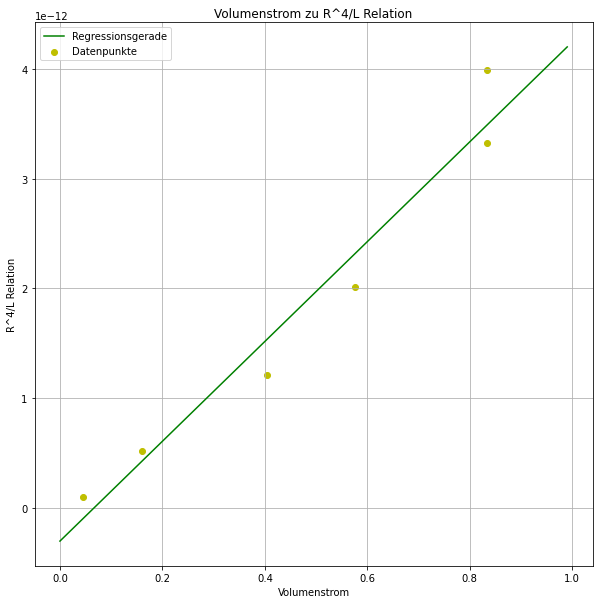

In [7]:
# Kappilar
laengeK = np.array([0.0952, 0.1211, 0.08, 0.0793, 0.1072, 0.0645])#m
rK = np.array([0.00075, 0.0005, 0.0003, 0.00075, 0.0006, 0.0006])#m
vol = np.array([50, 9.6, 2.7, 50, 24.2, 34.5])# ml
h = np.array([0.042, 0.056, 0.057, 0.0245, 0.051, 0.0495]) # m

tK = 60 
dichte_W = 998 # kg/m^3 20°C +-1


druck = dichte_W*pc.g*h

volS = vol/tK
rel = rK**4/laengeK


fig, ax = plt.subplots(figsize=(10,10))

x = np.arange(0, 1, 0.01)

m, b = np.polyfit(volS, rel, 1)
ax.plot(x,x*m+b,color='g',label="Regressionsgerade")

ax.scatter(volS, rel, color='y', label='Datenpunkte')

ax.set(xlabel='Volumenstrom', ylabel='R^4/L Relation', title='Volumenstrom zu R^4/L Relation')
ax.legend()
ax.grid()

visK = (pc.pi*druck*tK*rK**4)/(8*laengeK*vol)
print(visK)

#stroem_v = volS/(1000*pc.pi*rK**2) 
#d = rK*2
#reynold = (dichte_W*d*stroem_v)/visK
print('Reynoldszahlen: ', reynold)

In [18]:
# Fehlerfortpflanzung
gesch = np.array([3.0448352,   4.10761963,  5.30011925,  6.54129191,  8.04828974,  9.50118765, 10.91405184])
gesch_stu = np.array([0.04141609, 0.05233223, 0.06774867, 0.08693985, 0.10664896, 0.12873409, 0.1482127])

etas = np.array([])

for i in range(7):
    rho_K, rho_G, v, g, rad = symbols("rho_K rho_G v g rad")
    werte_K = np.array([dichte_K, dichte_G, gesch[i], 9.808, r[i]])
    unsicherheiten_K = np.array([dichte_K_stu, 50, gesch_stu[i], 0.001, 0.0001])
    variablen_k = np.array([rho_K, rho_G, v, g, rad])
    func = (2/(9*v))*(rad**2)*(rho_K-rho_G)*g
    func
    etas = np.append(etas ,fehler(func, werte_K, unsicherheiten_K, variablen_k))

#print(vis_arr*1000)
#print(etas*vis_arr*1000)
from platform import python_version

print(reynold)
reynoldDelta = np.array([])
for i in range(7):
    werte = np.array([dichte_G, gesch[i], 4*r[i], vis_arr[i]])
    unsicherheiten = np.array([50, gesch_stu[i], 4*r[i]*0.1, etas[i]*vis_arr[i]])
    exponenten = np.array([1, 1, 1, -1])
    reynoldDelta= np.append(reynoldDelta, einfachGaussMult(unsicherheiten, werte, exponenten))
print(reynoldDelta*reynold)

splitrey = np.split(reynold, 7)
splitdrey = np.split(reynoldDelta*reynold, 7)

reydict = {"3mm": splitrey[0],"3,5mm": splitrey[1],"4mm": splitrey[2],"4,5mm": splitrey[3],
          "5mm": splitrey[4],"5,5mm": splitrey[5],"6mm": splitrey[6]}
reyddict = {"3mm": splitdrey[0],"3,5mm": splitdrey[1],"4mm": splitdrey[2],"4,5mm": splitdrey[3],
          "5mm": splitdrey[4],"5,5mm": splitdrey[5],"6mm": splitdrey[6]}
print_to_table(reydict, reyddict, ['Re$\pm \Delta Re$'],["3,5mm", "4mm", "4,5mm", "5mm", 
               "5,5mm", "6mm"])

[0.77609768 0.89742058 1.01321007 1.11153941 1.23085657 1.32095814
 1.39094069]
[0.0842594170316545 0.0973352655644452 0.109897471628293 0.120629647922511
 0.133571525994731 0.143397279373994 0.150999197426185]
\begin{tabular}{l c c c c c c} \hline
 & 3,5mm & 4mm & 4,5mm & 5mm & 5,5mm & 6mm \\ 
 \hline
Re$\pm \Delta Re$ &
 $\mathbf{\phantom{0}0.9 \pm 0.1\phantom{0}}$ &
 $\mathbf{\phantom{0}1.0 \pm 0.1\phantom{0}}$ &
 $\mathbf{\phantom{0}1.1 \pm 0.1\phantom{0}}$ &
 $\mathbf{\phantom{0}1.2 \pm 0.1\phantom{0}}$ &
 $\mathbf{\phantom{0}1.3 \pm 0.1\phantom{0}}$ &
 $\mathbf{\phantom{0}1.4 \pm 0.2\phantom{0}}$
 \vspace*{0.0mm} \\
 \hline 
 \end{tabular}
